### Classifying Orthopedic Disease
#### Multi-class classification and PCA using the ["Biomechanical Features of Orthopedic Patients"](https://www.kaggle.com/uciml/biomechanical-features-of-orthopedic-patients) dataset on Kaggle.

## Part-I Multi-Class Classification with Imbalanced Dataset

The ML task is classifying patients as belonging to one out of three categories in `class` column: Normal (100 patients), Disk Hernia (60 patients) or Spondylolisthesis (150 patients). 

In [2]:
# Import all the necessary modules from python and sklearn

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt

from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import classification_report

from sklearn.decomposition import PCA

import seaborn as sns

In [3]:
# Load the column_3C_weka.csv data as a dataframe using pandas
data = pd.read_csv("C:/Users/tilin/Desktop/Coding Work/Machine Learning/Notebooks/PCA/column_3C_weka.csv")
data.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


In [5]:
# Check if there is any NAs
data.isna().sum()

pelvic_incidence            0
pelvic_tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [4]:
# Get feature vector X (all columns but "class") and target label y as "class"
X = data[['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis']]
y = data['class']

In [5]:
# Print X shape and head
print(X.shape)
X.head()

(310, 6)


,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501


In [9]:
# Print y shape, head, unique values and number of instances in each class
print(y.shape)
print(y.unique())
print(y.value_counts())

y.head()

(310,)
['Hernia' 'Spondylolisthesis' 'Normal']
Spondylolisthesis    150
Normal               100
Hernia                60
Name: class, dtype: int64


0    Hernia
1    Hernia
2    Hernia
3    Hernia
4    Hernia
Name: class, dtype: object

In [6]:
# Split the data to train and test with ratio of 70/30 for train/test respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(217, 6)
(217,)
(93, 6)
(93,)


In [139]:
# Create a RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=29, random_state=42)

In [140]:
# Perform a 10-fold cross validation with scoring='balanced_accuracy'
rf_cv_score = cross_val_score(rf_clf, X, y, scoring = "balanced_accuracy", cv = 10)

print("Mean cv Score - Random Forest: ", rf_cv_score.mean())

Mean cv Score - Random Forest:  0.7933333333333332


> Next, you're going to plot the impact of `n_estimators` hyperparameter on mean cv score. Read the comments in the following cell. cv `scoring` will still be `balanced_accuracy`. 

> **Note**: The following plot is given for your reference. However, notice that due to randomness, there might be slight differences, but the trend should be similar. Running this cell may take a few minutes.

Text(0.5, 1.0, 'Impact of n_estimators Hyperparameter')

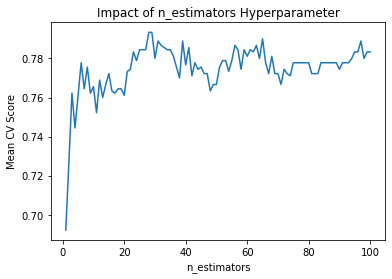

In [15]:
# Plot the impact of n_estimators hyperparameter on mean cv score as follows:
rf_mean_cv_scores = []
n_est_list = range(1, 101)

for iteration in n_est_list:
    new_rf_clf = RandomForestClassifier(n_estimators=iteration, random_state=42)
    new_rf_cv_score = cross_val_score(new_rf_clf, X, y, scoring = "balanced_accuracy", cv = 10)
    rf_mean_cv_scores.append(new_rf_cv_score.mean())


plt.plot(n_est_list, rf_mean_cv_scores)
plt.xlabel("n_estimators")
plt.ylabel("Mean CV Score")
plt.title("Impact of n_estimators Hyperparameter")

In [141]:
# Fit the rf_clf on the training set
rf_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=29, random_state=42)

In [142]:
# Get feature_importances of rf for all features
for name, score in zip(data, rf_clf.feature_importances_):
    print(name, score)

pelvic_incidence 0.15259865928918645
pelvic_tilt 0.09183674170457944
lumbar_lordosis_angle 0.09894694440791092
sacral_slope 0.17832578931409107
pelvic_radius 0.12013499112053529
degree_spondylolisthesis 0.3581568741636969


In [143]:
# Make predictions on the test set
y_pred = rf_clf.predict(X_test)

In [144]:
# Get the balanced accuracy of predictions on the test set
balanced_acc = balanced_accuracy_score(y_test, y_pred)
balanced_acc

0.8305555555555556

In [145]:
# Get classification report # Note: You must import the related module/method from sklearn to run this cell
print(classification_report(y_test, y_pred))

                   precision    recall  f1-score   support

           Hernia       0.77      0.62      0.69        16
           Normal       0.84      0.87      0.85        30
Spondylolisthesis       0.96      1.00      0.98        47

         accuracy                           0.89        93
        macro avg       0.86      0.83      0.84        93
     weighted avg       0.89      0.89      0.89        93



## Part II - PCA

In [26]:
# Create a pca with 3 principal components, and apply it on X and store the transformed data in X3D
pca = PCA(n_components = 3)
X3D = pca.fit_transform(X)

In [27]:
X3D.shape

(310, 3)

In [28]:
# Check the pca components
pca.components_.T[:,0]

array([ 0.32364565,  0.11319229,  0.30367474,  0.21045336, -0.02995983,
        0.86315378])

In [29]:
# Get the list of explained variance ratios for three PCs
pca.explained_variance_ratio_

array([0.70963571, 0.13759529, 0.07521804])

In [30]:
pc_df = pd.DataFrame(pca.components_,columns=X.columns,index = ['PC-1','PC-2', 'PC-3'])
pc_df

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
PC-1,0.323646,0.113192,0.303675,0.210453,-0.029960,0.863154
PC-2,-0.476635,-0.098563,-0.532784,-0.378072,0.321809,0.482438
PC-3,-0.001545,-0.264657,-0.496542,0.263113,-0.774613,0.118941


In [31]:
# Split the data to train and test with ratio of 70/30 for train/test respectively
X3D_train, X3D_test, y_train, y_test = train_test_split(X3D, y, test_size = 0.30)
print(X3D_train.shape)
print(y_train.shape)
print(X3D_test.shape)
print(y_test.shape)

(217, 3)
(217,)
(93, 3)
(93,)


In [32]:
# Create a RF classifier, set random_state=42, other hyperparameters should be the same as you tuned before
rf_clf = RandomForestClassifier(n_estimators=29, random_state=42)

In [33]:
# Perform a 10-fold cross validation with scoring='balanced_accuracy'
# cross validation should be done on X3D and y
rf_cv_score_3D = cross_val_score(rf_clf, X3D, y, scoring = "balanced_accuracy", cv = 10)

print("Mean cv Score - Random Forest: ", rf_cv_score_3D.mean())

Mean cv Score - Random Forest:  0.7155555555555557


In [15]:
# Fit the rf_clf on X3D_train
rf_clf.fit(X3D_train, y_train)

RandomForestClassifier(n_estimators=29, random_state=42)

In [16]:
# Make predictions on X3D_test
y_pred_3D = rf_clf.predict(X3D_test)

In [17]:
# Get the balanced accuracy of predictions on X3D_test
balanced_acc_3D = balanced_accuracy_score(y_test, y_pred_3D)
balanced_acc_3D

0.6728174603174603

In [18]:
# Get classification report of RF on X3D_test predictions
print(classification_report(y_test, y_pred_3D))

                   precision    recall  f1-score   support

           Hernia       0.37      0.44      0.40        16
           Normal       0.67      0.63      0.65        35
Spondylolisthesis       0.98      0.95      0.96        42

         accuracy                           0.74        93
        macro avg       0.67      0.67      0.67        93
     weighted avg       0.75      0.74      0.75        93



Text(0, 0.5, 'Explained Variance Ratio')

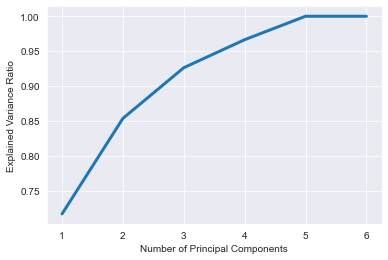

In [19]:
# Plot the cumulative explained variance as a function of number of principal components
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
sns.set_style("darkgrid")

plt.plot([1,2,3,4,5,6], cumsum, linewidth = 3)
plt.xlabel("Number of Principal Components")
plt.ylabel("Explained Variance Ratio")


In [36]:
d = np.argmax(cumsum >= 0.97) + 1
pca = PCA(n_components = d)
X_reduced = pca.fit_transform(X)

rf_clf = RandomForestClassifier(n_estimators=29, random_state=42)

rf_cv_score_3D = cross_val_score(rf_clf, X_reduced, y, scoring = "balanced_accuracy", cv = 10)

print("Mean cv Score - Random Forest: ", rf_cv_score_3D.mean())

Mean cv Score - Random Forest:  0.7911111111111111
